# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np

In [2]:

cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]

dtypes = {"DAY": np.int64,"PRODUCT_ID": np.int64,"QUANTITY": np.int64}

df = pd.read_csv("D:\\Udemy\\Pandas\\Pandas+Course+Resources\\Pandas Course Resources\\project_data\\project_transactions.csv", usecols=cols, dtype=dtypes)

In [3]:
# Use the following snippet to create a Date Column.

df = (
    df
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(df["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

<Axes: title={'center': 'Sum of sales by month'}, xlabel='date'>

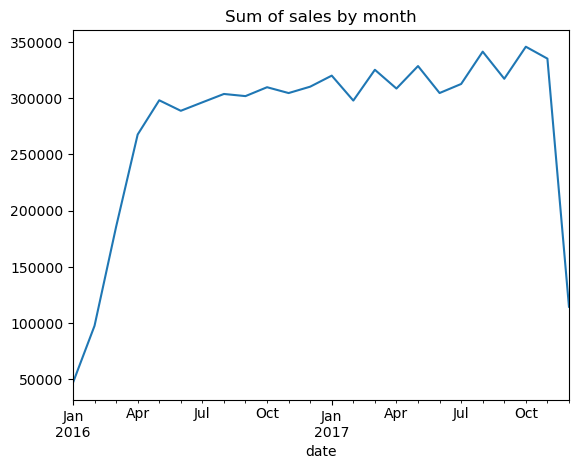

In [4]:
#Sum of sales by month
monthly_sales = df.groupby(df["date"].dt.to_period("M"))["SALES_VALUE"].sum()
monthly_sales.plot(title="Sum of sales by month")

<Axes: title={'center': 'Sales from apr 2016 to oct 2017'}, xlabel='date'>

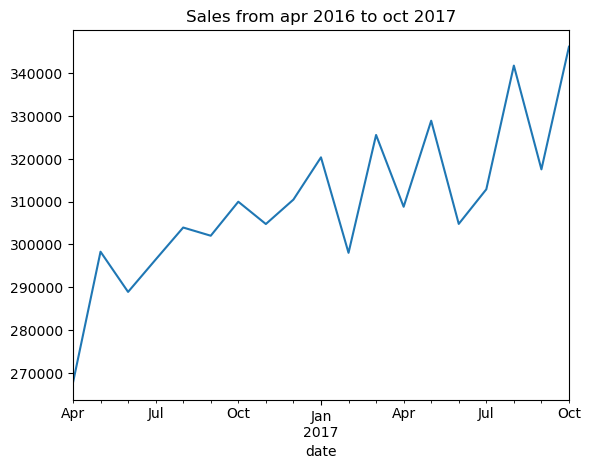

In [5]:
# sales from apr 2016 to oct 2017
apr_oct = df.groupby(df["date"].dt.to_period("M"))["SALES_VALUE"].sum().loc["2016-04":"2017-10"]  
apr_oct.plot(title="Sales from apr 2016 to oct 2017")

<Axes: xlabel='date'>

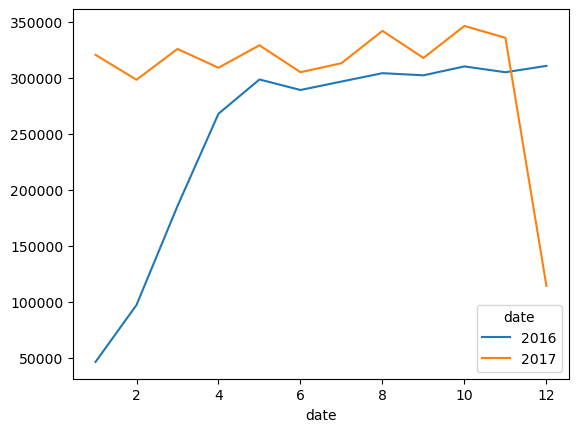

In [6]:
#monthly_sales in 2016 vs 2017
monthly_sales_16v17 = df.groupby([df["date"].dt.year, df["date"].dt.month])["SALES_VALUE"].sum().loc["2016":"2017"]
monthly_sales_16v17.unstack(level = 0).plot()

<Axes: title={'center': 'Total sales by day of week'}, xlabel='date'>

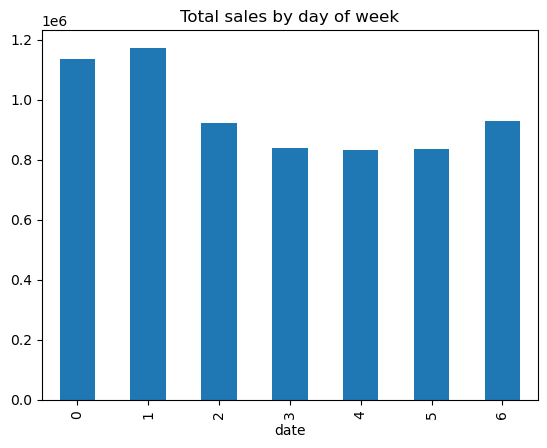

In [7]:
#total sales by day of week
day_week_sales = df.groupby(df["date"].dt.dayofweek)["SALES_VALUE"].sum()
day_week_sales.plot.bar(title="Total sales by day of week")

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [8]:
dem_cols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]

dem_type = {"AGE_DESC": "category", "INCOME_DESC": "category", "HH_COMP_DESC":"category", "household_key": np.int64}

dem_df = pd.read_csv("D:\\Udemy\\Pandas\\Pandas+Course+Resources\\Pandas Course Resources\\project_data\\hh_demographic.csv", usecols=dem_cols, dtype=dem_type)


In [9]:
# sales by household
household_sales = df.groupby("household_key")["SALES_VALUE"].sum()
household_sales

household_key
1       4330.16
2       1954.34
3       2653.21
4       1200.11
5        779.06
         ...   
2095    3790.49
2096    1301.65
2097    8823.83
2098     682.46
2099     691.30
Name: SALES_VALUE, Length: 2099, dtype: float64

In [10]:
#dem_df merge househols sale
house_merge_tran = dem_df.merge(household_sales, on="household_key", how="inner")
house_merge_tran

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key,SALES_VALUE
0,65+,35-49K,2 Adults No Kids,1,4330.16
1,45-54,50-74K,2 Adults No Kids,7,3400.05
2,25-34,25-34K,2 Adults Kids,8,5534.97
3,25-34,75-99K,2 Adults Kids,13,13190.92
4,45-54,50-74K,Single Female,16,1512.02
...,...,...,...,...,...
663,45-54,100-124K,Unknown,2087,7832.74
664,25-34,35-49K,Single Female,2088,4905.71
665,35-44,Under 15K,1 Adult Kids,2092,2290.54
666,45-54,50-74K,2 Adults No Kids,2094,3055.52


C:\Users\Admin\AppData\Local\Temp\ipykernel_11360\1912375795.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = house_merge_tran.groupby("AGE_DESC")["SALES_VALUE"].sum()


<Axes: title={'center': 'Sales by age_desc'}, xlabel='AGE_DESC'>

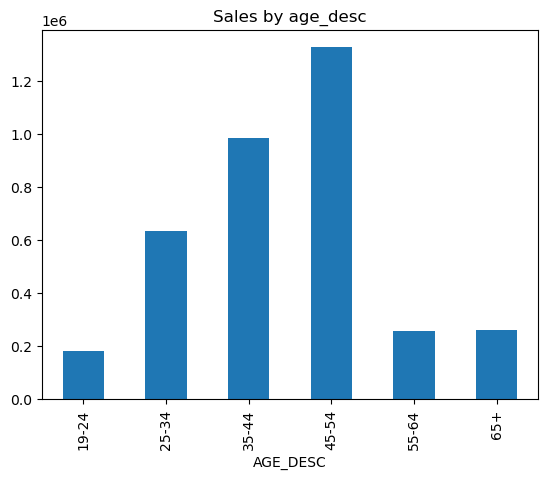

In [11]:
# sales by age_desc
age_sales = house_merge_tran.groupby("AGE_DESC")["SALES_VALUE"].sum()
age_sales.plot.bar(title="Sales by age_desc")

C:\Users\Admin\AppData\Local\Temp\ipykernel_11360\149418682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_sales = house_merge_tran.groupby("INCOME_DESC")["SALES_VALUE"].sum()


<Axes: title={'center': 'Sales by age_desc'}, xlabel='INCOME_DESC'>

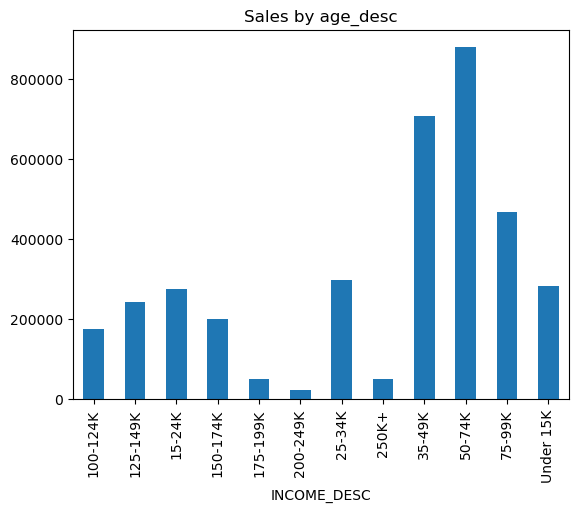

In [12]:
# sales by imcome_desc
income_sales = house_merge_tran.groupby("INCOME_DESC")["SALES_VALUE"].sum()
income_sales.plot.bar(title="Sales by age_desc")

In [13]:
#mean based on housegold sales
house_merge_tran.pivot_table(index="AGE_DESC", columns="HH_COMP_DESC", values="SALES_VALUE", aggfunc="mean")

C:\Users\Admin\AppData\Local\Temp\ipykernel_11360\2807133683.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  house_merge_tran.pivot_table(index="AGE_DESC", columns="HH_COMP_DESC", values="SALES_VALUE", aggfunc="mean")


HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [14]:
product_cols = ["PRODUCT_ID", "DEPARTMENT"]

product_dtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT": "category"}

prod_df = pd.read_csv("D:\\Udemy\\Pandas\\Pandas+Course+Resources\\Pandas Course Resources\\project_data\\product.csv", usecols=product_cols, dtype=product_dtypes)


In [15]:
# join all 3 df
trans_dem_prod_df = df.merge(dem_df, on="household_key").merge(prod_df, on="PRODUCT_ID")
trans_dem_prod_df

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,1364,26984896261,897044,1,2.99,2016-01-01,65+,100-124K,Single Female,GROCERY
2,1364,26984896261,920955,1,3.09,2016-01-01,65+,100-124K,Single Female,MEAT
3,1364,26984896261,937406,1,2.50,2016-01-01,65+,100-124K,Single Female,MEAT-PCKGD
4,1364,26984896261,981760,1,0.60,2016-01-01,65+,100-124K,Single Female,GROCERY
...,...,...,...,...,...,...,...,...,...,...
1161570,1369,42302712189,844054,1,1.29,2017-12-11,25-34,Under 15K,Single Male,GROCERY
1161571,1369,42302712189,844759,1,1.69,2017-12-11,25-34,Under 15K,Single Male,GROCERY
1161572,1369,42302712189,959737,2,25.98,2017-12-11,25-34,Under 15K,Single Male,GROCERY
1161573,1369,42302712189,1135096,1,1.99,2017-12-11,25-34,Under 15K,Single Male,GROCERY


In [16]:
# sales by age and department
sales_age_dept = trans_dem_prod_df.pivot_table(index="DEPARTMENT", columns="AGE_DESC", values="SALES_VALUE", aggfunc="sum")
sales_age_dept

C:\Users\Admin\AppData\Local\Temp\ipykernel_11360\2387938151.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sales_age_dept = trans_dem_prod_df.pivot_table(index="DEPARTMENT", columns="AGE_DESC", values="SALES_VALUE", aggfunc="sum")


AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.00,0.00,0.00,0.00,0.00,0.00
AUTOMOTIVE,11.64,21.25,72.58,55.92,0.00,16.37
CHARITABLE CONT,0.00,0.00,0.00,0.00,0.00,0.00
CHEF SHOPPE,81.30,134.16,348.53,418.24,80.86,149.24
CNTRL/STORE SUP,2.00,0.00,1.00,9.95,2.00,0.10
COSMETICS,698.63,2273.03,4362.02,5187.57,986.26,600.90
COUP/STR & MFG,7.49,48.42,121.20,154.55,40.68,20.49
DAIRY DELI,3.80,3.85,7.39,16.75,3.14,1.94
DELI,4043.30,18181.94,34577.29,44334.22,9850.54,10462.33


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [17]:
# export to excel
path = "D:\\Udemy\\Pandas\\Pandas+Course+Resources\\Pandas Course Resources\\project_data\\sales_age_dept.xlsx"
sales_age_dept.to_excel(path, sheet_name="sales_age_dept")

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === CONFIG ===
DATA_DIR = "./"   # folder where your CSVs are stored
OUTPUT_DIR = "./charts"  # folder where charts will be saved
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Theme colors (match your PPT: blue + orange accent)
primary_color = "#2F5597"   # deep blue
accent_color = "#E97B23"    # orange
bar_color = "#5B9BD5"       # lighter blue
highlight_color = "#FFC000" # gold

# === LOAD DATA ===
df = pd.read_csv(os.path.join(DATA_DIR, "D:\\Udemy\\Pandas\\Pandas+Course+Resources\\Pandas Course Resources\\project_data\\project_transactions.csv"))
hh = pd.read_csv(os.path.join(DATA_DIR, "D:\\Udemy\\Pandas\\Pandas+Course+Resources\\Pandas Course Resources\\project_data\\hh_demographic.csv"))
prod = pd.read_csv(os.path.join(DATA_DIR, "D:\\Udemy\\Pandas\\Pandas+Course+Resources\\Pandas Course Resources\\project_data\\product.csv"))

# Create DATE from DAY
if "DAY" in df.columns:
    df["DATE"] = pd.to_datetime("2011-01-01") + pd.to_timedelta(df["DAY"], unit="D")
else:
    df["DATE"] = pd.to_datetime(df["DATE"])

df["SALES_VALUE"] = pd.to_numeric(df["SALES_VALUE"], errors="coerce").fillna(0)

# Add Year / Month for grouping
df["YEAR"] = df["DATE"].dt.year
df["MONTH"] = df["DATE"].dt.month

# === 1. TIME-BASED ANALYSIS ===

# Monthly Sales Trend
monthly = df.groupby(pd.Grouper(key="DATE", freq="M"))["SALES_VALUE"].sum()
fig, ax = plt.subplots(figsize=(8,4))
monthly.plot(ax=ax, color=primary_color, linewidth=2)
ax.set_title("Monthly Sales Trend", fontsize=14, fontweight="bold")
ax.set_xlabel("Month"); ax.set_ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "monthly_sales.png"))
plt.close()

# 2016 vs 2017
m2016 = df[df["YEAR"]==2016].groupby("MONTH")["SALES_VALUE"].sum()
m2017 = df[df["YEAR"]==2017].groupby("MONTH")["SALES_VALUE"].sum()
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(m2016.index-0.2, m2016.values, width=0.4, label="2016", color=bar_color)
ax.bar(m2017.index+0.2, m2017.values, width=0.4, label="2017", color=accent_color)
ax.set_title("2016 vs 2017 Monthly Sales", fontsize=14, fontweight="bold")
ax.set_xlabel("Month"); ax.set_ylabel("Sales")
ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "2016_vs_2017.png"))
plt.close()

# Sales by Day of Week
dow = df.groupby(df["DATE"].dt.day_name())["SALES_VALUE"].sum()
dow = dow.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
fig, ax = plt.subplots(figsize=(8,4))
dow.plot.bar(ax=ax, color=[bar_color if d not in ["Saturday","Sunday"] else accent_color for d in dow.index])
ax.set_title("Sales by Day of Week", fontsize=14, fontweight="bold")
ax.set_xlabel("Day"); ax.set_ylabel("Sales")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "sales_by_dow.png"))
plt.close()

# === 2. DEMOGRAPHICS ===

# Merge hh demographics with sales
hh_sales = df.groupby("household_key")["SALES_VALUE"].sum().reset_index()
hh_merged = hh.merge(hh_sales, on="household_key", how="inner")

# Sales by Age
age_sales = hh_merged.groupby("AGE_DESC")["SALES_VALUE"].sum()
fig, ax = plt.subplots(figsize=(8,4))
age_sales.plot.bar(ax=ax, color=bar_color)
ax.set_title("Sales by Age Group", fontsize=14, fontweight="bold")
ax.set_ylabel("Sales")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "sales_by_age.png"))
plt.close()

# Sales by Income
income_sales = hh_merged.groupby("INCOME_DESC")["SALES_VALUE"].sum()
fig, ax = plt.subplots(figsize=(8,4))
income_sales.plot.bar(ax=ax, color=accent_color)
ax.set_title("Sales by Income Group", fontsize=14, fontweight="bold")
ax.set_ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "sales_by_income.png"))
plt.close()

# Household Composition
comp_sales = hh_merged.groupby("HH_COMP_DESC")["SALES_VALUE"].sum()
fig, ax = plt.subplots(figsize=(8,4))
comp_sales.plot.bar(ax=ax, color=primary_color)
ax.set_title("Sales by Household Composition", fontsize=14, fontweight="bold")
ax.set_ylabel("Sales")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "sales_by_household.png"))
plt.close()

# === 3. PRODUCT PERFORMANCE ===

df_prod = df.merge(prod, on="PRODUCT_ID", how="left")

# Sales by Department
dept_sales = df_prod.groupby("DEPARTMENT")["SALES_VALUE"].sum().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8,4))
dept_sales.plot.barh(ax=ax, color=bar_color)
ax.set_title("Top 10 Departments by Sales", fontsize=14, fontweight="bold")
ax.set_xlabel("Sales")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "sales_by_dept.png"))
plt.close()

# Average Basket Size
basket_sales = df.groupby(["BASKET_ID"])["SALES_VALUE"].sum()
basket_date = df.groupby("BASKET_ID")["DATE"].min()
basket_df = pd.DataFrame({"DATE": basket_date, "BASKET_SALES": basket_sales})
basket_df["MONTH"] = basket_df["DATE"].dt.to_period("M").dt.to_timestamp()
avg_basket = basket_df.groupby("MONTH")["BASKET_SALES"].mean()
fig, ax = plt.subplots(figsize=(8,4))
avg_basket.plot(ax=ax, color=accent_color, linewidth=2)
ax.set_title("Average Basket Size Over Time", fontsize=14, fontweight="bold")
ax.set_ylabel("Average Basket Sales")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "avg_basket.png"))
plt.close()

# Pareto Top Products
prod_sales = df_prod.groupby("PRODUCT_ID")["SALES_VALUE"].sum().sort_values(ascending=False)
cumperc = prod_sales.cumsum()/prod_sales.sum()*100
fig, ax = plt.subplots(figsize=(10,5))
prod_sales.head(20).plot.bar(ax=ax, color=bar_color)
ax2 = ax.twinx()
cumperc.head(20).plot(ax=ax2, color=accent_color, marker="o")
ax.set_title("Top Products Pareto Analysis", fontsize=14, fontweight="bold")
ax.set_ylabel("Sales"); ax2.set_ylabel("Cumulative %")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "pareto_products.png"))
plt.close()

print(f"✅ Charts saved in folder: {OUTPUT_DIR}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_11360\1032610510.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key="DATE", freq="M"))["SALES_VALUE"].sum()


✅ Charts saved in folder: ./charts
